In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot

from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("Traffic_Violations_2.csv")

In [3]:
#data[data['Belts'] == 'Yes']
#data.groupby(['Race']).agg(['count'])
d = data.value_counts(['Arrest Type']).reset_index(name='c')
d

,Arrest Type,c
0,A - Marked Patrol,192287
1,Q - Marked Laser,34393
2,B - Unmarked Patrol,10526
3,S - License Plate Recognition,4158
4,O - Foot Patrol,3565
5,L - Motorcycle,3033
6,E - Marked Stationary Radar,1781
7,G - Marked Moving Radar (Stationary),1519
8,R - Unmarked Laser,1237
9,I - Marked Moving Radar (Moving),617


In [4]:
len(data['Charge'].unique())

737

In [5]:
gender = data.value_counts(['Gender']).reset_index(name='count')
gender

,Gender,count
0,M,174761
1,F,79380
2,U,117


In [6]:
race = data.value_counts(['Race']).reset_index(name='count')
race

,Race,count
0,WHITE,89583
1,BLACK,79437
2,HISPANIC,58224
3,ASIAN,13531
4,OTHER,13055
5,NATIVE AMERICAN,428


In [7]:
model = data.value_counts(['Model']).reset_index(name='count')
model

,Model,count
0,4S,27217
1,TK,16260
2,ACCORD,9363
3,CIVIC,8829
4,CAMRY,7818
...,...,...
6324,MURANO SL,1
6325,ACCORD 4D,1
6326,MURONO,1
6327,MUSANG,1


In [8]:
make = data.value_counts(['Make']).reset_index(name='count')
make.head(20)

,Make,count
0,HONDA,27738
1,TOYOTA,27619
2,FORD,24727
3,NISSAN,13887
4,TOYT,13176
5,HOND,8829
6,CHEV,7588
7,DODGE,7224
8,BMW,7215
9,CHEVY,6385


In [9]:
year = data.value_counts(['Year']).reset_index(name='count')
year.head(20)

,Year,count
0,2006.0,15680
1,2007.0,15438
2,2005.0,14827
3,2004.0,14616
4,2003.0,14321
5,2012.0,14152
6,2013.0,14017
7,2008.0,13887
8,2011.0,13273
9,2002.0,12798


In [10]:
color = data.value_counts(['Color']).reset_index(name='count')
color

,Color,count
0,BLACK,51149
1,SILVER,45446
2,WHITE,40100
3,GRAY,27662
4,RED,20078
5,BLUE,18482
6,GREEN,9091
7,GOLD,8530
8,"BLUE, DARK",5631
9,TAN,5055


In [11]:
data['time_data'] = data['Time Of Stop'].apply(lambda x: x.split(":")[0]) #data['Time Of Stop']
time = data.value_counts(['time_data']).reset_index(name='count')
time

,time_data,count
0,23,17587
1,22,16862
2,08,15369
3,00,14616
4,01,12847
5,09,12671
6,16,12398
7,21,12173
8,10,12044
9,17,11990


In [12]:
data['month'] = data['Date Of Stop'].apply(lambda x: x.split("/")[0]) #data['Time Of Stop']
month = data.value_counts(['month']).reset_index(name='count')
month

,month,count
0,05,27793
1,04,27746
2,06,26522
3,10,26353
4,08,25112
5,09,24677
6,07,24001
7,11,22758
8,03,17728
9,02,10766


In [13]:
belts = data.value_counts(['Belts']).reset_index(name='Count')
belts

,Belts,Count
0,No,243393
1,Yes,10865


In [14]:
np_belts_before = np.array([0,0])
np_belts_after = np.array([0,0])

from datetime import datetime
seatbelt_law_date = datetime.strptime("08/01/2013", "%m/%d/%Y")

for index, item in data.iterrows():
    if index % 100 == 0:
        print(index, end="\r")
    temp_date = datetime.strptime(item['Date Of Stop'], "%m/%d/%Y")
    if temp_date.date() <= seatbelt_law_date.date(): # Before the law
        if item.Belts.lower() == "no":
            np_belts_before[1] += 1
        else:
            np_belts_before[0] += 1
    else:
        if item.Belts.lower() == "no":
            np_belts_after[1] += 1
        else:
            np_belts_after[0] += 1
print(f"Belts before: {np_belts_before}")
print(f"Belts after: {np_belts_after}")

np_belts_after_adjusted = np_belts_after
np_belts_after_adjusted[0] = np_belts_after_adjusted[0] / 4
np_belts_after_adjusted[1] = np_belts_after_adjusted[1] / 4

print(f"Adjusted belts after: {np_belts_after_adjusted}")



Belts before: [ 1584 31888]
Belts after: [  9281 211505]
Adjusted belts after: [ 2320 52876]


([], [])


<BarContainer object of 2 artists>

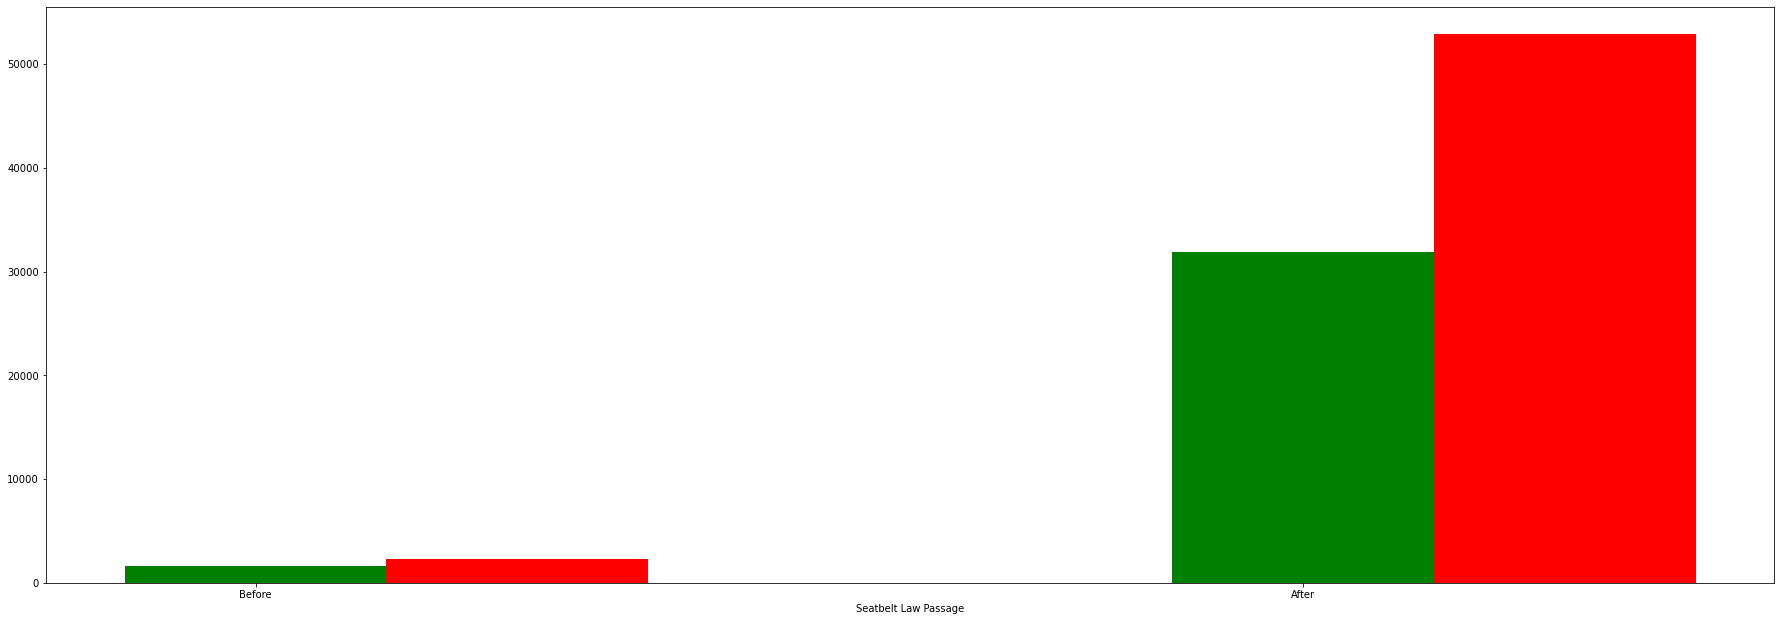

In [15]:
X = np.arange(2)
fig = plt.figure()

ax = fig.add_axes([0,0,4,2])
law_classification = ['Before', 'After']

ax.set_xlabel("Seatbelt Law Passage")
ax.set_xticks(range(2))
ax.set_xticklabels(law_classification)

print(ax.get_legend_handles_labels())

ax.bar(X + 0.00, np_belts_before, color = 'g', width = 0.25)
ax.bar(X + 0.25, np_belts_after_adjusted, color = 'r', width = 0.25)

In [16]:
from sklearn.cluster import KMeans
import numpy as np

d = data['Geolocation']
d = d.dropna()

geolocation = np.zeros((len(d), 2))

j = 0
for i in d:
    t = i.replace("(","")
    t = t.replace(")","")
    geolocation[j][0] = float(t.split(',')[0])
    geolocation[j][1] = float(t.split(',')[1])
    j=j+1

print(geolocation.shape)
geolocation = np.delete(geolocation, [2393], 0)
print(geolocation.shape)

geolocation = geolocation[geolocation[:,1] < 0]


(233365, 2)
(233364, 2)


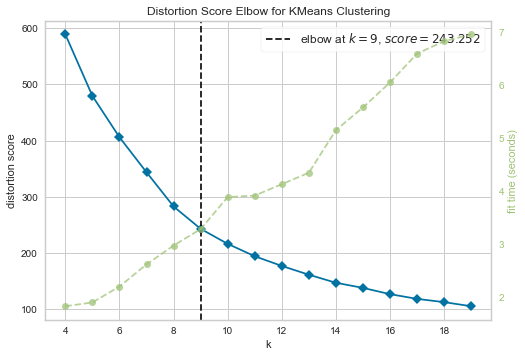

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
size = 200000
#plotting the results:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20))

visualizer.fit(geolocation[0:size,])        # Fit the data to the visualizer
visualizer.show()

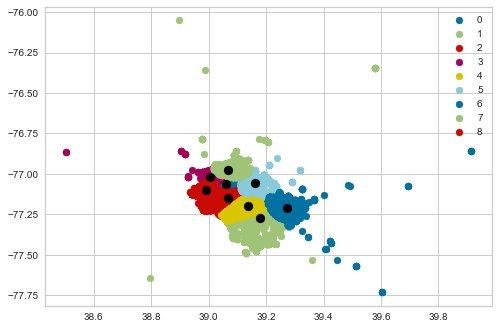

In [18]:
kmeans = KMeans(n_clusters=9, random_state=0)
label = kmeans.fit_predict(geolocation[0:size,])

new_geolocation = geolocation[0:size,]
location_with_label = np.zeros((size, 3))


for i in range(size):
    location_with_label[i][0] = new_geolocation[i][0]
    location_with_label[i][1] = new_geolocation[i][1]
    location_with_label[i][2] = label[i]

u_labels = np.unique(label)
for i in u_labels:
    filtered_label = location_with_label[location_with_label[:,2] == i]
    plt.scatter(filtered_label[:,0] , filtered_label[:,1] , label = i)
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()


((39.9147366666667, 38.502245), (-76.0514883333333, -77.7322566666667))

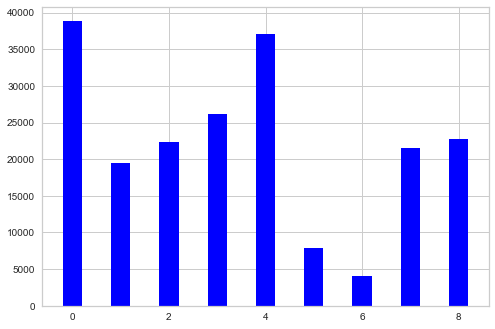

In [19]:
label_count = {}
for i in u_labels:
    filtered_label = location_with_label[location_with_label[:,2] == i]
    # print(np.max(filtered_label[:,0]), np.min(filtered_label[:,0]))
    # print(np.max(filtered_label[:,1]), np.min(filtered_label[:,1]))

    label_count[i] = filtered_label.shape[0]
plt.bar(u_labels, list(label_count.values()), color ='blue',
        width = 0.4)
np.max(location_with_label[:,0])

# BBox = ((np.max(location_with_label[:,0]),  np.min(location_with_label[:,0]),      
#          np.max(location_with_label[:,1]),  np.min(location_with_label[:,1])

lat_max = np.max(location_with_label[:,0],axis=0)
lat_min = np.min(location_with_label[:,0],axis=0)
long_max = np.max(location_with_label[:,1],axis=0)
long_min = np.min(location_with_label[:,1],axis=0)

BBox = ((lat_max, lat_min),(long_max,long_min))

BBox


In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

import shutil
shutil.unpack_archive("./roads/main.zip", "./roads/", "zip")

usa = gpd.read_file("C:\\Users\\A02351046\\cs5830_final\\roads\\gis_osm_roads_free_1.shp")

geometry = [Point(xy) for xy in zip(location_with_label[:,1], location_with_label[:,0])]

geo_df = gpd.GeoDataFrame(crs = usa.crs, geometry = geometry)
fig, ax = plt.subplots(figsize=(15,15))
usa.plot(ax=ax, alpha = 0.4)
geo_df.plot(ax=ax, color='red', markersize=10)